In [264]:
# Importing the libraries
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

sns.set_style("ticks")
sns.set_style('whitegrid')

In [265]:
df = pd.read_csv("data/cleaned_final_data.csv") # OR USE searchData/limitData
df = df.drop_duplicates()
print(df.dtypes)
df.sample(frac=1).head(5)

year                       int64
month                      int64
region                    object
town                      object
block                     object
street_name               object
lease_commence_date        int64
month_remaining_lease      int64
flat_type                 object
flat_model                 int64
floor_area_sqm           float64
storey_range_low           int64
storey_range_high          int64
nearest_mrt               object
min_dist_mrt             float64
nearest_mall              object
min_dist_mall            float64
min_dist_town_in_km      float64
total_population         float64
cpi                      float64
psi                        int64
resale_price             float64
dtype: object


,year,month,region,town,block,street_name,lease_commence_date,month_remaining_lease,flat_type,flat_model,...,storey_range_high,nearest_mrt,min_dist_mrt,nearest_mall,min_dist_mall,min_dist_town_in_km,total_population,cpi,psi,resale_price
46154,2019,3,north,WOODLANDS,780C,WOODLANDS CRESCENT,2015,1144,3 ROOM,8,...,15,ADMIRALTY MRT STATION,0.948719,Woodlands Mart,0.523065,18.187236,1.716009,99.972,53,309000.0
46164,2019,3,north,WOODLANDS,824,WOODLANDS STREET 81,1989,835,4 ROOM,16,...,6,WOODLANDS MRT STATION,0.361772,Causeway Point,0.424055,17.671477,1.716009,99.972,53,300000.0
54542,2019,8,central,BISHAN,248,BISHAN STREET 22,1992,864,4 ROOM,8,...,3,BRIGHT HILL MRT STATION,1.172991,AMK Hub,1.045058,7.638662,1.716009,100.209,59,560000.0
84883,2020,11,north,YISHUN,364,YISHUN RING ROAD,1988,797,EXECUTIVE,7,...,3,YISHUN MRT STATION,1.074284,Junction Nine,0.560192,15.076873,1.703850,100.105,43,625000.0
60850,2019,11,central,GEYLANG,322,UBI AVENUE 1,1985,779,4 ROOM,16,...,6,UBI MRT STATION,0.661087,Singpost Centre,1.523626,6.981544,1.716009,100.254,71,360000.0


In [266]:
cols_to_norm = [
    'month_remaining_lease', 'floor_area_sqm',
    'storey_range_low', 'storey_range_high',
    'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'resale_price']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [267]:
# Convert categorical columns to numerical
#df['flat_model'] = df['flat_model'].astype('category').cat.codes
#df['town_num'] = df['town'].astype('category').cat.codes
#df['region_num'] = df['region'].astype('category').cat.codes
df.head(5)


,year,month,region,town,block,street_name,lease_commence_date,month_remaining_lease,flat_type,flat_model,...,storey_range_high,nearest_mrt,min_dist_mrt,nearest_mall,min_dist_mall,min_dist_town_in_km,total_population,cpi,psi,resale_price
0,2017,1,central,ANG MO KIO,406,ANG MO KIO AVENUE 10,1979,0.334855,2 ROOM,5,...,0.1875,BISHAN DEPOT,0.257462,AMK Hub,0.311318,0.385026,0.63474,99.026,29,0.071987
1,2017,1,central,ANG MO KIO,108,ANG MO KIO AVENUE 4,1978,0.321157,3 ROOM,12,...,0.0000,MAYFLOWER MRT STATION,0.046331,Broadway Plaza,0.277670,0.444717,0.63474,99.026,29,0.086072
2,2017,1,central,ANG MO KIO,602,ANG MO KIO AVENUE 5,1980,0.354642,3 ROOM,12,...,0.0000,LENTOR MRT STATION,0.131016,Broadway Plaza,0.474936,0.503145,0.63474,99.026,29,0.095462
3,2017,1,central,ANG MO KIO,465,ANG MO KIO AVENUE 10,1980,0.348554,3 ROOM,12,...,0.0625,ANG MO KIO MRT STATION,0.261477,myVillage At Serangoon Garden,0.277530,0.410110,0.63474,99.026,29,0.097809
4,2017,1,central,ANG MO KIO,601,ANG MO KIO AVENUE 5,1980,0.354642,3 ROOM,12,...,0.0000,LENTOR MRT STATION,0.122820,Broadway Plaza,0.488574,0.505303,0.63474,99.026,29,0.097809


/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_23808/3317269562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_23808/3317269562.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


                           year     month  lease_commence_date  \
year                   1.000000 -0.109528             0.124814   
month                 -0.109528  1.000000             0.009307   
lease_commence_date    0.124814  0.009307             1.000000   
month_remaining_lease  0.000132  0.002777             0.991769   
flat_model            -0.012993 -0.008086            -0.119049   
floor_area_sqm        -0.014882  0.004697             0.135443   
storey_range_low       0.019966 -0.003247             0.279048   
storey_range_high      0.019966 -0.003247             0.279048   
min_dist_mrt          -0.007204 -0.001518            -0.157125   
min_dist_mall         -0.002928 -0.006006            -0.250935   
min_dist_town_in_km   -0.004003  0.003347             0.295062   
total_population      -0.269021  0.016775            -0.051496   
cpi                    0.809193  0.020610             0.087124   
psi                   -0.222901 -0.019832            -0.022849   
resale_pri

<Axes: >

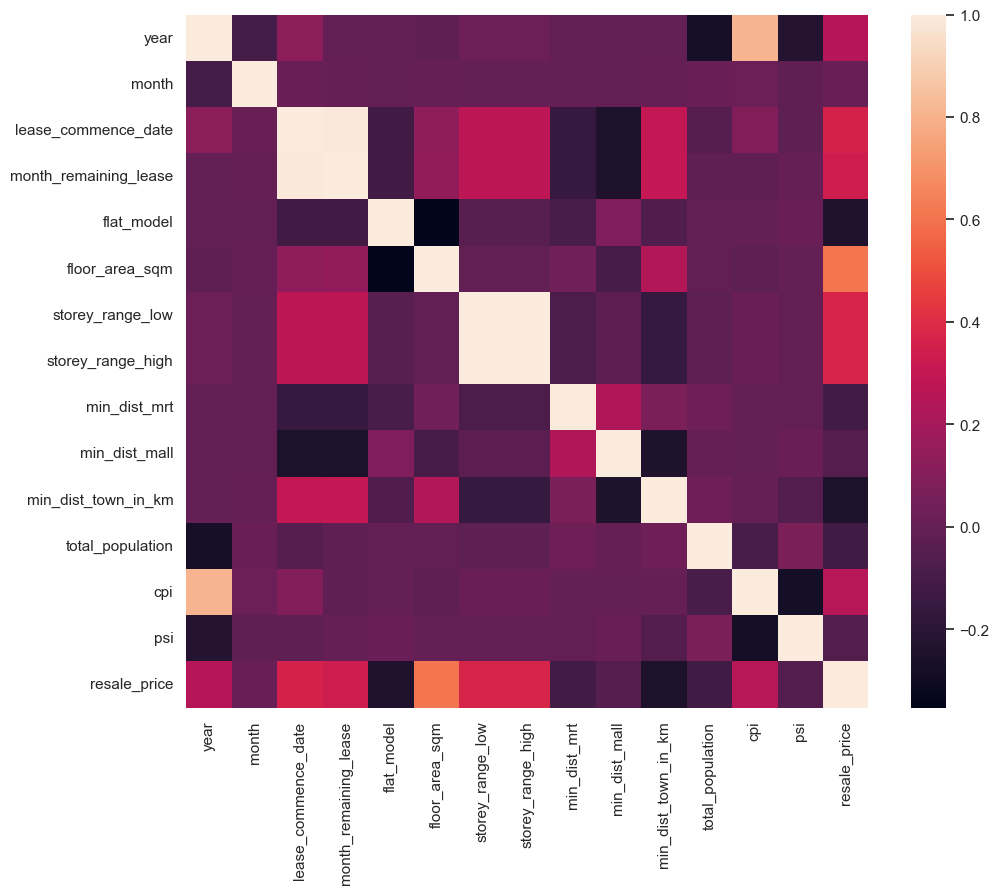

In [262]:
# Compute the correlation matrix
corr = df.corr()
print(corr)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())

<Axes: title={'center': 'Town'}>

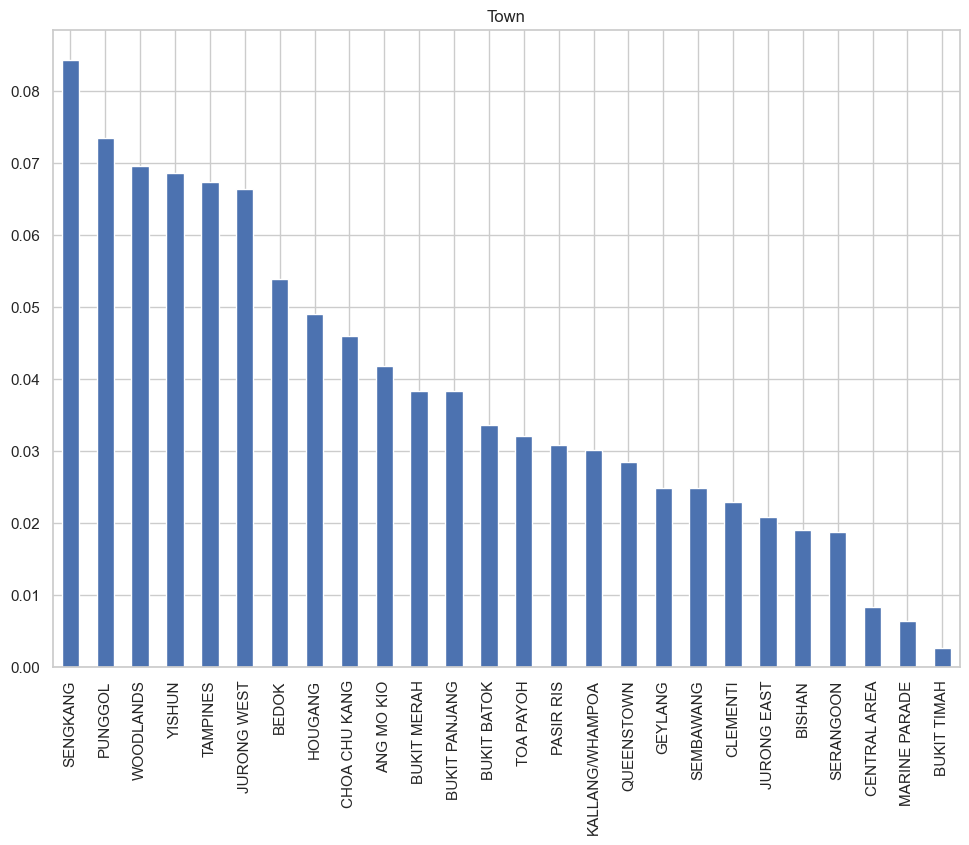

In [263]:
df.town.value_counts(normalize=True).plot(kind='bar', title='Town')

<Axes: title={'center': 'Flat Type'}>

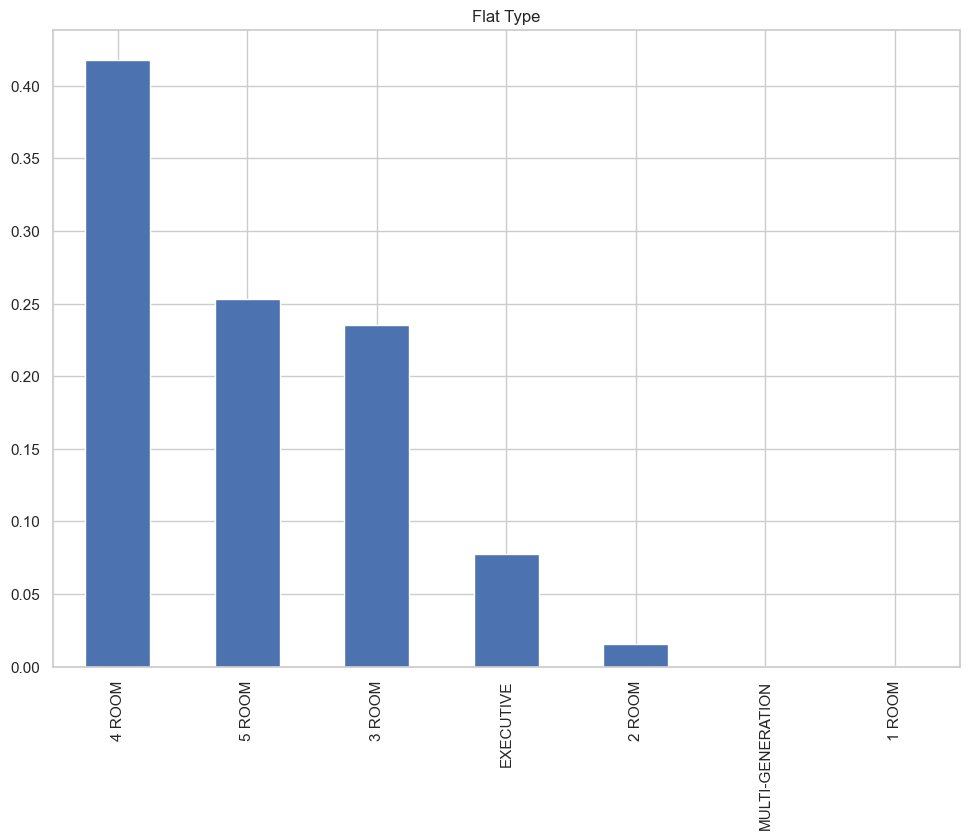

In [ ]:
df.flat_type.value_counts(normalize=True).plot(kind='bar', title='Flat Type')

/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_23808/2773353438.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['town'] == town].groupby(['year', 'month']).mean()['resale_price'].plot(label=town)
/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_23808/2773353438.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['town'] == town].groupby(['year', 'month']).mean()['resale_price'].plot(label=town)


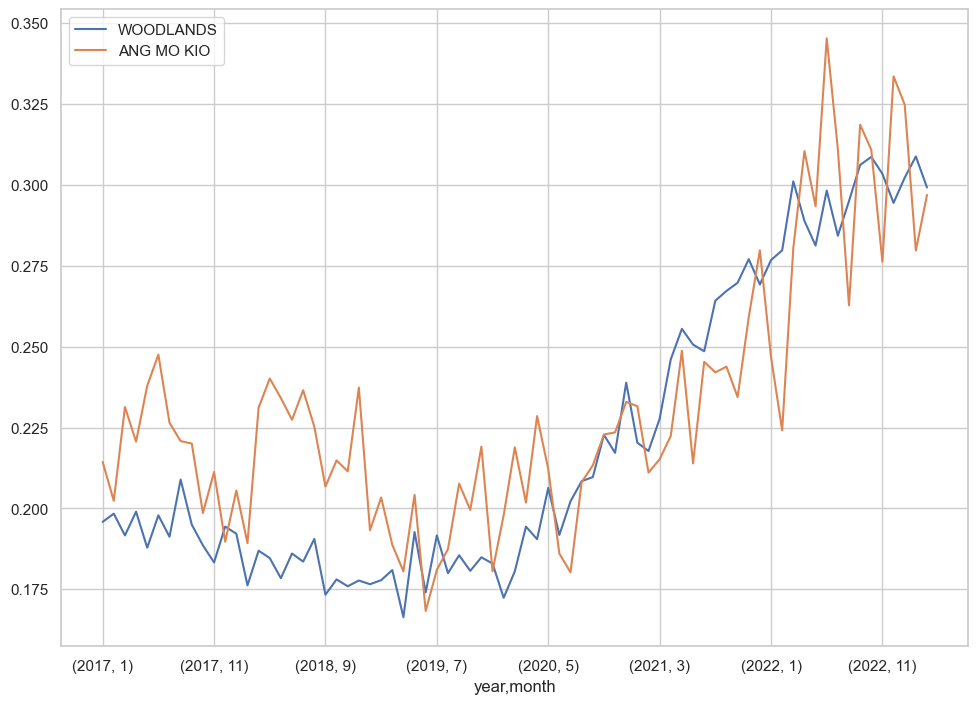

In [ ]:
# for each month and year, plot the mean price into line chart with legend
def query_mean_plot_by_town(town):
    df[df['town'] == town].groupby(['year', 'month']).mean()['resale_price'].plot(label=town)
    plt.legend()
    
query_mean_plot_by_town('WOODLANDS')
query_mean_plot_by_town('ANG MO KIO')

/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_23808/2853581161.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


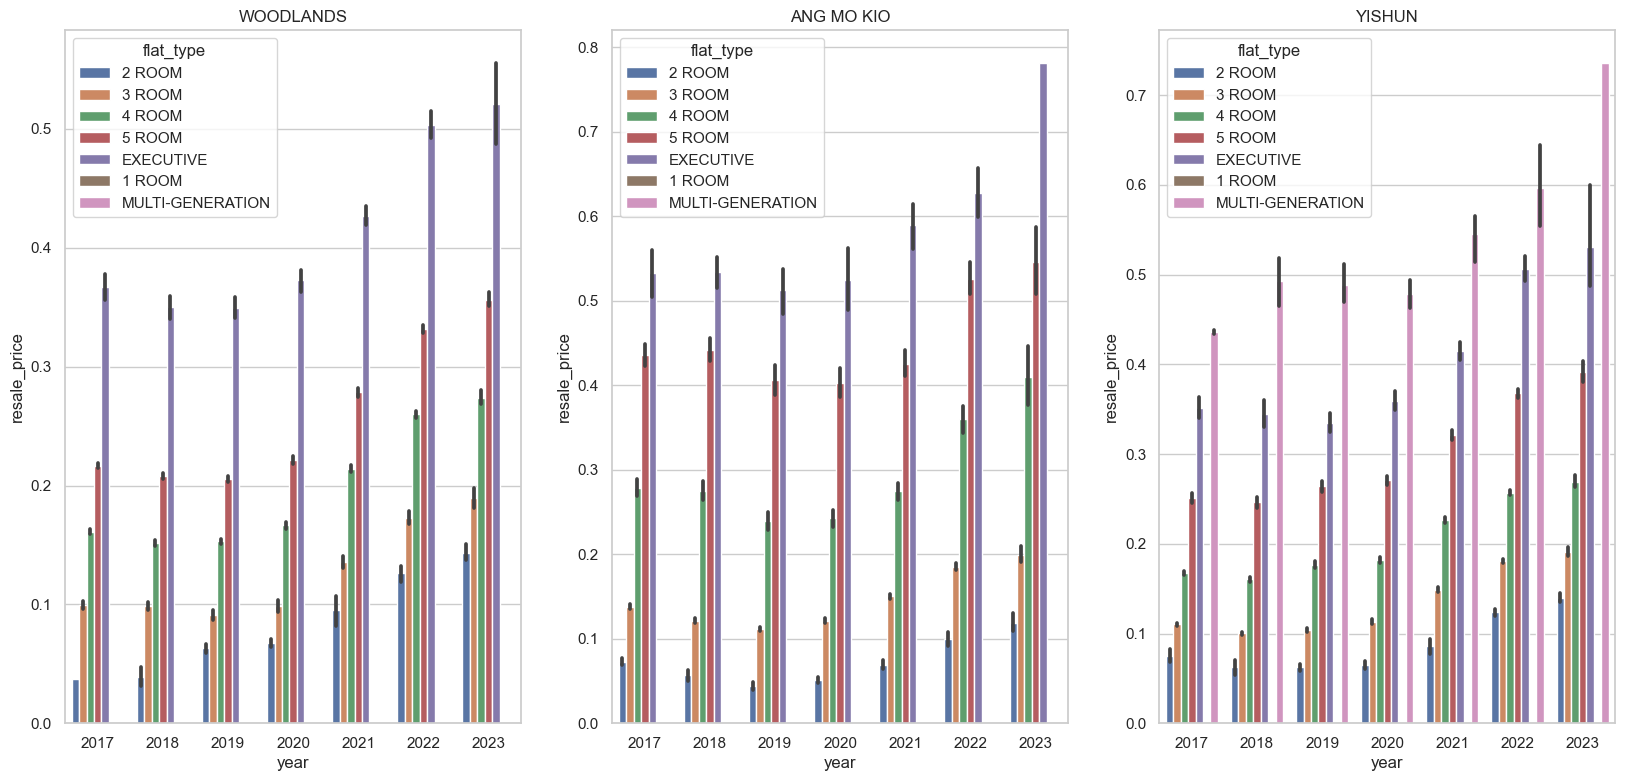

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))

def plot_year_against_price(town):
    sns.barplot(data=df[df['town'] == town], x="year", y="resale_price", hue="flat_type", hue_order=df.flat_type.unique())
    plt.title(town)
        
plt.subplot(131)
plot_year_against_price('WOODLANDS')
plt.subplot(132)
plot_year_against_price('ANG MO KIO')
plt.subplot(133)
plot_year_against_price('YISHUN')

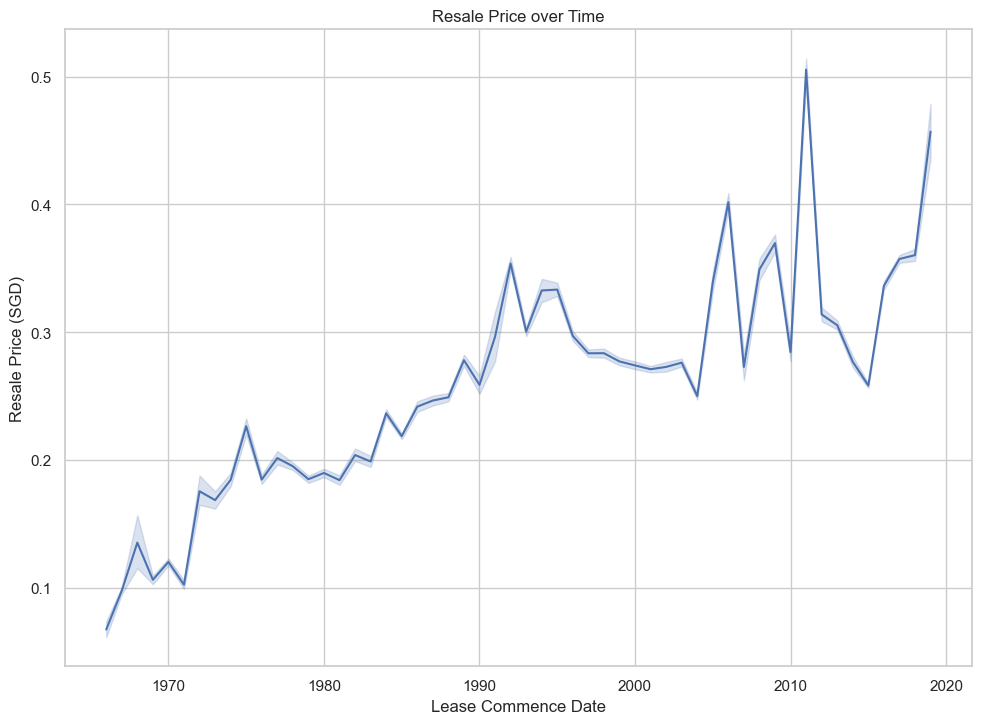

In [ ]:
# line plot of lease commence date and resale price
sns.lineplot(x='lease_commence_date', y='resale_price', data=df)
plt.title('Resale Price over Time')
plt.xlabel('Lease Commence Date')
plt.ylabel('Resale Price (SGD)')
plt.show()

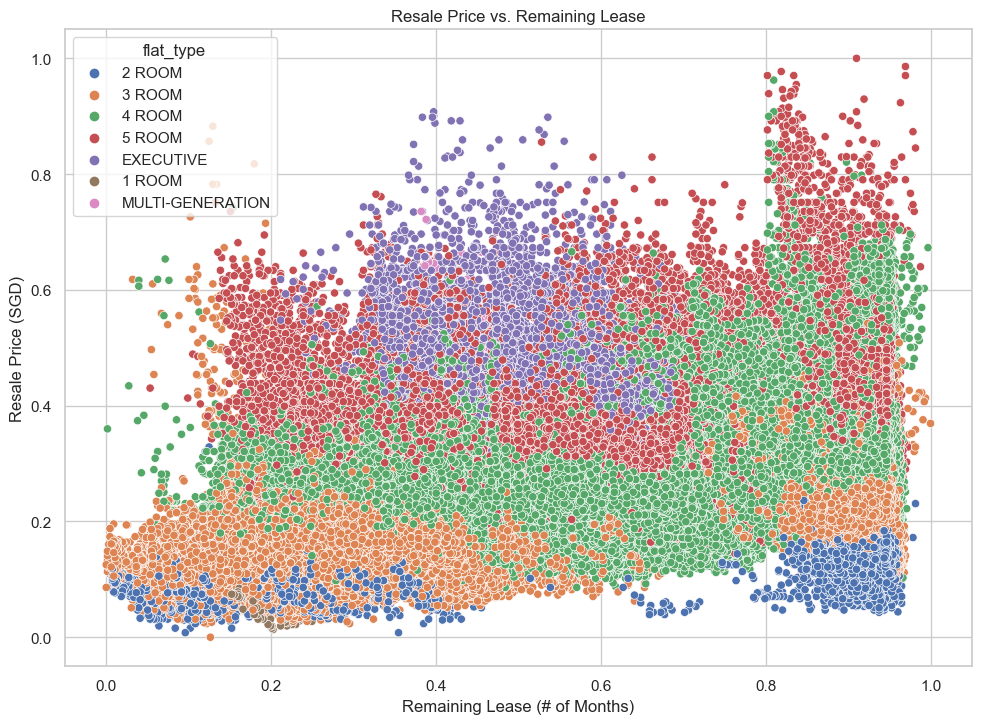

In [ ]:
# scatter plot of remaining lease and resale price
sns.scatterplot(x='month_remaining_lease', y='resale_price', hue='flat_type', data=df)
plt.title('Resale Price vs. Remaining Lease')
plt.xlabel('Remaining Lease (# of Months)')
plt.ylabel('Resale Price (SGD)')
plt.show()

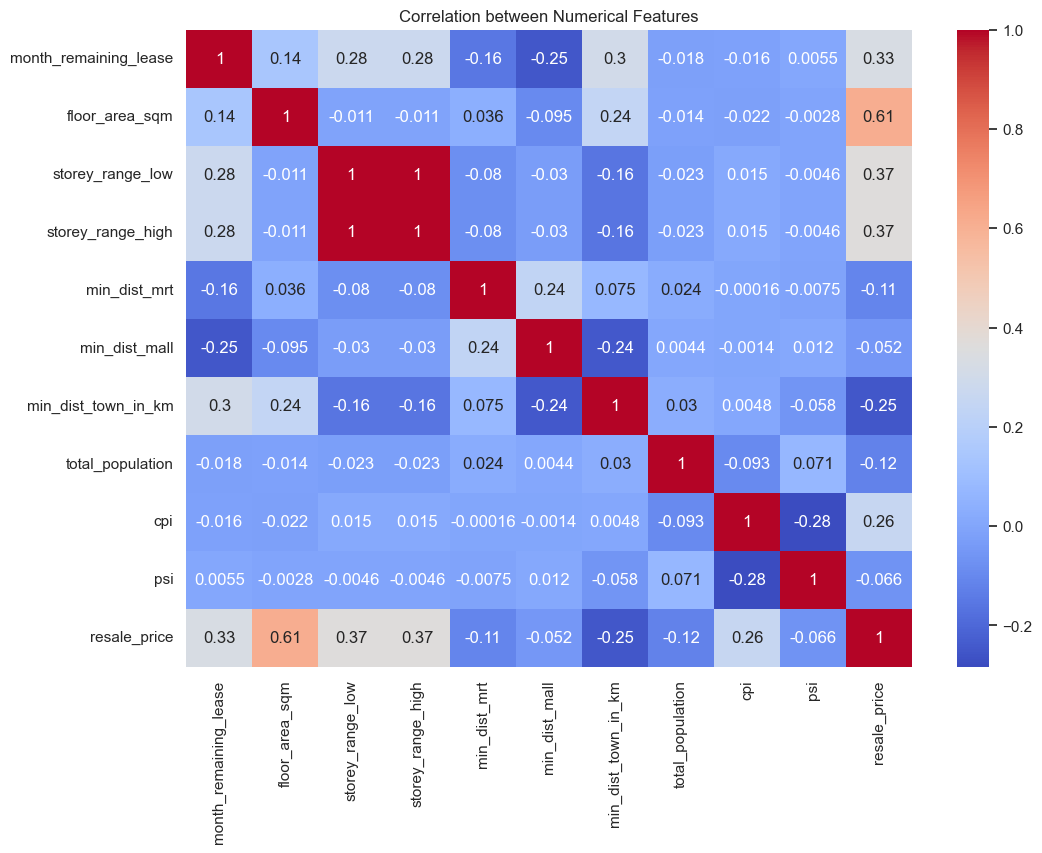

In [ ]:
num_col = [
    'month_remaining_lease', 'floor_area_sqm',
    'storey_range_low', 'storey_range_high',
    'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'cpi', 'psi', 'resale_price']

corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()

In [294]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [295]:
class PredictionModel:
    def __init__(self, regressor_type):
        self.numeric_features = ['month_remaining_lease', 'floor_area_sqm',
            'storey_range_low', 'storey_range_high',
            'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'cpi', 'psi']
        self.cat_features = ['flat_model']
        
        self.y_col = 'resale_price'
        self.regressor_type = regressor_type
    
    def train_model_town(self, final_df, town, flat_type):
        target_df = final_df[(final_df['town'] == town) & (final_df['flat_type'] == flat_type)]
        y = target_df[self.y_col]
        X = target_df[self.numeric_features + self.cat_features]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return True
    

    def fit(self):
        if self.regressor_type == "DecisionTreeRegressor":
            classifier = DecisionTreeRegressor(random_state=46)
        elif self.regressor_type == "RandomForestRegressor":
            classifier = RandomForestRegressor(n_estimators=100, random_state=48)
        elif self.regressor_type == "GradientBoostingRegressor":
            classifier = GradientBoostingRegressor()
    
        col_trans = make_column_transformer(
                (OneHotEncoder(),self.cat_features),
                remainder = "passthrough"
        )
        
        regressor = make_pipeline(col_trans, classifier)
        
        return regressor.fit(self.X_train, self.y_train)
    
    def predict(self, regressor):
        return regressor.predict(self.X_test)

    def evaluate(self, y_pred):
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        print("Mean Squared Error: {:.4f}".format(rmse))
        r2 = r2_score(self.y_test, y_pred)
        print("R2 score: {}".format(r2))
        
        plt.figure(figsize=(7,4))
        plt.scatter(self.y_test, y_pred, c='crimson')
        plt.yscale('log')
        plt.xscale('log')

        p1 = max(max(y_pred), max(self.y_test))
        p2 = min(min(y_pred), min(self.y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        plt.show()

    
    def plot_importance(self, regressor):
        fig, ax = plt.subplots(figsize=(7, 4))
        importances = pd.Series(data=regressor.feature_importances_, index=self.X_train.columns)
        importances_sorted = importances.sort_values()
        importances_sorted.plot(kind='barh', color='lightgreen')
        plt.title('Features Importances')
        plt.show()
    
    
    def plot_permutation(self, regressor):
        fig, ax = plt.subplots(figsize=(7, 4))
        result = permutation_importance(regressor, self.X_test, self.y_test, n_repeats=10, random_state=42, n_jobs=2)
        sorted_idx = result.importances_mean.argsort()
        plt.boxplot(
            result.importances[sorted_idx].T,
            vert=False,
            labels=np.array(self.features)[sorted_idx],
        )
        plt.title("Permutation Importance (test set)")
        plt.show()

In [300]:
town = 'WOODLANDS'
flat_type = '4 ROOM'

fig = plt.figure(figsize=(6, 6))
df = df.dropna()

<Figure size 600x600 with 0 Axes>

WOODLANDS - 4 ROOM
Mean Squared Error: 0.0135
R2 score: 0.9446535180036485


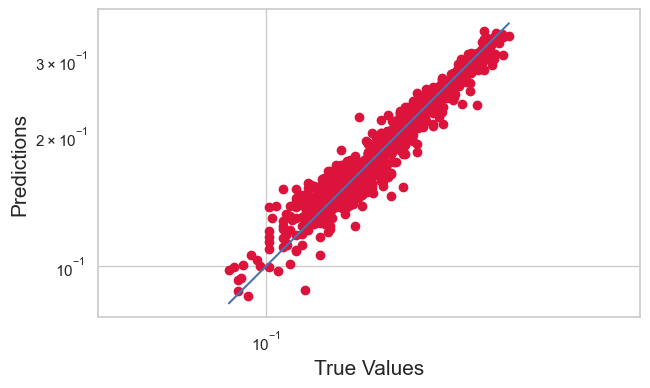

In [301]:
# Random Forest Regressor
print(town, "-", flat_type)
random_forest_model = PredictionModel('RandomForestRegressor')
random_forest_model.train_model_town(df.copy(), town, flat_type)
random_forest_regressor = random_forest_model.fit()
y_pred = random_forest_model.predict(random_forest_regressor)
random_forest_model.evaluate(y_pred)

WOODLANDS - 4 ROOM
Mean Squared Error: 0.0132
R2 score: 0.9467774869200586


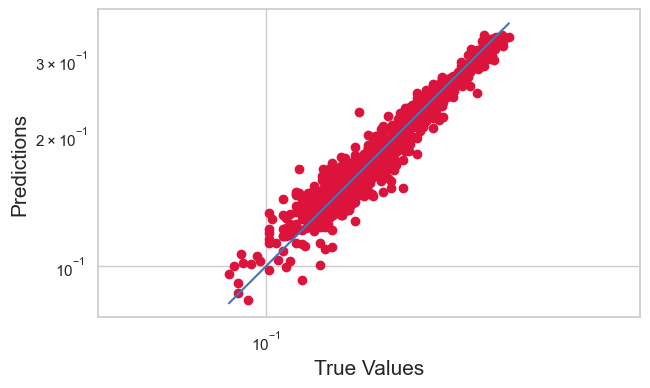

In [302]:
# Gradient Boosting Regressor
print(town, "-", flat_type)
random_forest_model = PredictionModel('GradientBoostingRegressor')
random_forest_model.train_model_town(df.copy(), town, flat_type)
random_forest_regressor = random_forest_model.fit()
y_pred = random_forest_model.predict(random_forest_regressor)
random_forest_model.evaluate(y_pred)